In [1]:
import pickle

from absl import app
from absl import flags

from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TYPE_TO_COLOR = {
    3: "black",  # Boundary particles.
    0: "green",  # Rigid solids.
    7: "magenta",  # Goop.
    6: "gold",  # Sand.
    5: "blue",  # Water.
}


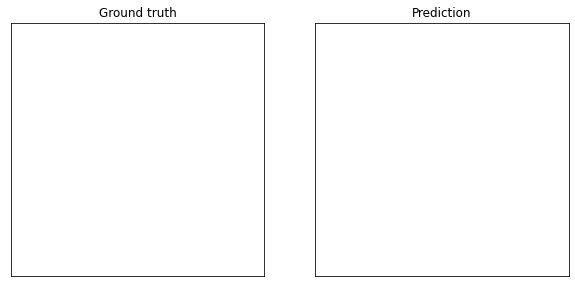

In [7]:
rollout_path="/home/anakin513/Projects/UTAustin/Particle - Graph Network/learning_to_simulate/rollout_visualize/rollout_test_1.pkl"
step_stride=3
block_on_show=False

with open(rollout_path, "rb") as file:
    rollout_data = pickle.load(file)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_info = []
for ax_i, (label, rollout_field) in enumerate(
    [("Ground truth", "ground_truth_rollout"),
     ("Prediction", "predicted_rollout")]):
  # Append the initial positions to get the full trajectory.
  trajectory = np.concatenate([
      rollout_data["initial_positions"],
      rollout_data[rollout_field]], axis=0)
  ax = axes[ax_i]
  ax.set_title(label)
  bounds = rollout_data["metadata"]["bounds"]
  ax.set_xlim(bounds[0][0], bounds[0][1])
  ax.set_ylim(bounds[1][0], bounds[1][1])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_aspect(1.)
  points = {
      particle_type: ax.plot([], [], "o", ms=2, color=color)[0]
      for particle_type, color in TYPE_TO_COLOR.items()}
  plot_info.append((ax, trajectory, points))

num_steps = trajectory.shape[0]

def update(step_i):
    outputs = []
    for _, trajectory, points in plot_info:
      for particle_type, line in points.items():
        mask = rollout_data["particle_types"] == particle_type
        line.set_data(trajectory[step_i, mask, 0],
                      trajectory[step_i, mask, 1])
        outputs.append(line)
    return outputs

unused_animation = animation.FuncAnimation(
    fig, update,
    frames=np.arange(0, num_steps, step_stride), interval=10)
plt.show(block=block_on_show)


In [10]:
unused_animation.save("video.mp4")

In [8]:
rollout_data

{'initial_positions': array([[[0.36829928, 0.47826713],
         [0.35545436, 0.48095435],
         [0.35497558, 0.47183245],
         ...,
         [0.23795559, 0.60371864],
         [0.26486164, 0.6258969 ],
         [0.44359732, 0.62220234]],
 
        [[0.36829928, 0.47817367],
         [0.35545436, 0.48086077],
         [0.35497558, 0.47173908],
         ...,
         [0.23795559, 0.6036252 ],
         [0.26486164, 0.62580365],
         [0.44359732, 0.6221091 ]],
 
        [[0.36829928, 0.47801882],
         [0.35545436, 0.480706  ],
         [0.35497558, 0.47158432],
         ...,
         [0.23795559, 0.6034704 ],
         [0.26486164, 0.62564903],
         [0.44359732, 0.6219545 ]],
 
        [[0.36829928, 0.47780272],
         [0.35545436, 0.4804899 ],
         [0.35497558, 0.47136816],
         ...,
         [0.23795559, 0.60325444],
         [0.26486164, 0.6254331 ],
         [0.44359732, 0.62173855]],
 
        [[0.36829928, 0.47752523],
         [0.35545436, 0.4802124 ],
 